### Problem 3: Multiple Regression
Extend your simple Bayesian regression model from the previous exercise into a multiple regression
model:
σ ∼ Inv-Gamma(τ0, τ1) (1)
α ∼ Normal(0, σα) (2)
β ∼ Multivariate-Normal(0, σβI) (3)
yn ∼ Normal(α + βxT
n
, σ) for n = 1, . . . , N, (4)
where you need to set the hyperparameters of the prior (i.e., τ0, τ1, σβ, σα) to some reasonable
values. Next, use your Stan program to fit a Bayesian multiple regression model for the Insurance Costs data set: https://github.com/stedy/Machine-Learning-with-R-datasets/blob/
master/insurance.csv.

Your goal is to predict the insurance charges (charges) from a patient’s BMI (bmi), age (age),
and number of children (children). Thus, you need to estimate three regression weights (β1, β2,
and β3), along with the intercept (α), and the noise parameter (σ). It is also recommended that you
standardize your predictors (i.e., subtract the means from the input variables and divide by their
standard deviations) in order to bring them to a common scale. Split the data into a training set
and a test set and fit the model only to the training set. Perform the usual convergence checks and
describe your results. Which of the three variables is the best predictor of Insurance Charges?

**Alternative:** Use the Bayesian Ridge regression implementation from scikit-learn: https://
scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html, also
for the next task. If you go this path, include a small description on how the Bayesian ridge differs
from the model implementation suggested above.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from cmdstanpy import CmdStanModel
import os
import matplotlib.pyplot as plt
import arviz as az

In [ ]:
# Load and preprocess the insurance data
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)

In [ ]:
# Select relevant features
features = ['bmi', 'age', 'children']
target = 'charges'

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])
y = df[target].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Stan model as a string
stan_code = '''
data {
  int<lower=0> N;
  int<lower=0> K;
  matrix[N, K] X;
  vector[N] y;
  real<lower=0> tau0;
  real<lower=0> tau1;
  real<lower=0> sigma_alpha;
  real<lower=0> sigma_beta;
}
parameters {
  real alpha;
  vector[K] beta;
  real<lower=0> sigma;
}
model {
  sigma ~ inv_gamma(tau0, tau1);
  alpha ~ normal(0, sigma_alpha);
  beta ~ normal(0, sigma_beta);
  y ~ normal(alpha + X * beta, sigma);
}
'''
# Write the model to a .stan file
with open("bayesian_multiple_regression.stan", "w") as f:
    f.write(stan_code)

# Prepare data dictionary for Stan
stan_data = {
    "N": X_train.shape[0],
    "K": X_train.shape[1],
    "X": X_train,
    "y": y_train,
    "tau0": 2,
    "tau1": 2,
    "sigma_alpha": 10,
    "sigma_beta": 10
}

In [ ]:
# Compile the model
model = CmdStanModel(stan_file="bayesian_multiple_regression.stan")

# Sample from the posterior
fit = model.sample(data=stan_data, chains=4, iter_sampling=1000, iter_warmup=500)

DEBUG:cmdstanpy:Removing /content/bayesian_multiple_regression
00:26:06 - cmdstanpy - INFO - compiling stan file /content/bayesian_multiple_regression.stan to exe file /content/bayesian_multiple_regression
INFO:cmdstanpy:compiling stan file /content/bayesian_multiple_regression.stan to exe file /content/bayesian_multiple_regression
DEBUG:cmdstanpy:cmd: make STANCFLAGS+=--filename-in-msg=bayesian_multiple_regression.stan /content/bayesian_multiple_regression
cwd: /root/.cmdstan/cmdstan-2.36.0
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc --filename-in-msg=bayesian_multiple_regression.stan --o=/content/bayesian_multiple_regression.hpp /content/bayesian_multiple_regression.stan

--- Compiling C++ code ---
g++ -std=c++17 -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes -Wno-class-memaccess      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ 

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/bayesian_multiple_regression', 'id=1', 'random', 'seed=95913', 'data', 'file=/tmp/tmptmn71kmf/5nb317gz.json', 'output', 'file=/tmp/tmptmn71kmf/bayesian_multiple_regressionnjdj_r80/bayesian_multiple_regression-20250413002630_1.csv', 'method=sample', 'num_samples=1000', 'num_warmup=500', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/content/bayesian_multiple_regression', 'id=2', 'random', 'seed=95913', 'data', 'file=/tmp/tmptmn71kmf/5nb317gz.json', 'output', 'file=/tmp/tmptmn71kmf/bayesian_multiple_regressionnjdj_r80/bayesian_multiple_regression-20250413002630_2.csv', 'method=sample', 'num_samples=1000', 'num_warmup=500', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/bayesian_multip

00:26:38 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/bayesian_multiple_regression', 'id=1', 'random', 'seed=95913', 'data', 'file=/tmp/tmptmn71kmf/5nb317gz.json', 'output', 'file=/tmp/tmptmn71kmf/bayesian_multiple_regressionnjdj_r80/bayesian_multiple_regression-20250413002630_1.csv', 'method=sample', 'num_samples=1000', 'num_warmup=500', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmptmn71kmf/bayesian_multiple_regressionnjdj_r80/bayesian_multiple_regression-20250413002630_1.csv
 console_msgs (if any):
	/tmp/tmptmn71kmf/bayesian_multiple_regressionnjdj_r80/bayesian_multiple_regression-20250413002630_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 500
    save_warmup = false (

In [ ]:
# Summary of the posterior
print(fit.summary())

DEBUG:cmdstanpy:cmd: /root/.cmdstan/cmdstan-2.36.0/bin/stansummary --percentiles= 5,50,95 --sig_figs=6 --csv_filename=/tmp/tmptmn71kmf/stansummary-bayesian_multiple_regression-3sffczlk.csv /tmp/tmptmn71kmf/bayesian_multiple_regressionnjdj_r80/bayesian_multiple_regression-20250413002630_1.csv /tmp/tmptmn71kmf/bayesian_multiple_regressionnjdj_r80/bayesian_multiple_regression-20250413002630_2.csv /tmp/tmptmn71kmf/bayesian_multiple_regressionnjdj_r80/bayesian_multiple_regression-20250413002630_3.csv /tmp/tmptmn71kmf/bayesian_multiple_regressionnjdj_r80/bayesian_multiple_regression-20250413002630_4.csv
cwd: None


                 Mean      MCSE     StdDev        MAD          5%  \
lp__    -11038.400000  0.034765    1.54946    1.33434 -11041.3000   
alpha        4.281690  0.149132    9.72351    9.87106    -11.7427   
beta[1]      0.887978  0.143171   10.04200    9.79246    -16.0014   
beta[2]      0.957996  0.144460   10.06860   10.34290    -15.3931   
beta[3]      0.135468  0.143734   10.01870   10.16550    -15.9237   
sigma    17940.700000  5.893250  381.90600  390.88700  17322.9000   

                  50%         95%  ESS_bulk  ESS_tail     R_hat  
lp__    -11038.100000 -11036.5000   2020.25   3114.89  0.999900  
alpha        4.255100     20.2937   4278.76   3174.55  0.999786  
beta[1]      0.744167     17.4868   4978.78   2798.12  1.000550  
beta[2]      0.982204     17.7294   4886.15   3263.45  1.000470  
beta[3]      0.033484     16.6461   5002.47   3016.97  0.999824  
sigma    17935.800000  18562.7000   4270.04   3260.26  1.000560  


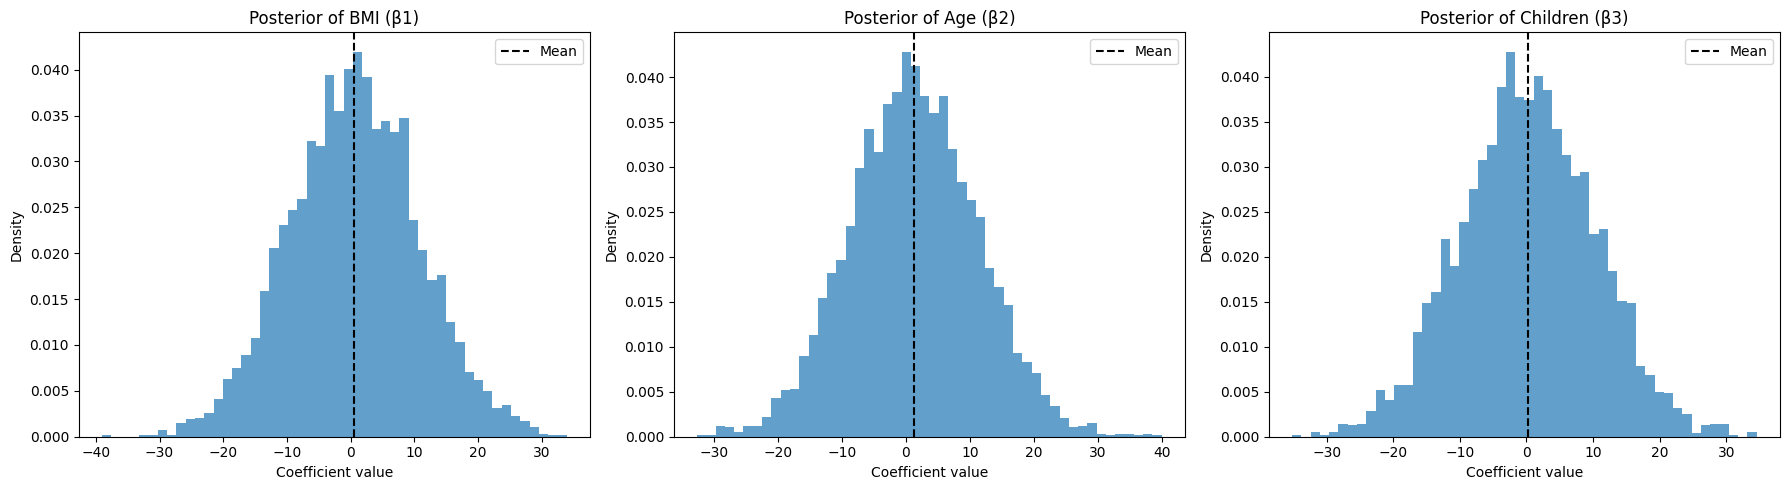

In [ ]:
# Extract posterior samples
beta_samples = [posterior_df[f'beta[{i+1}]'] for i in range(3)]
beta_labels = ['BMI (β1)', 'Age (β2)', 'Children (β3)']

# Plotting the posterior distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i in range(3):
    axes[i].hist(beta_samples[i], bins=50, density=True, alpha=0.7)
    axes[i].axvline(beta_samples[i].mean(), color='black', linestyle='--', label='Mean')
    axes[i].set_title(f'Posterior of {beta_labels[i]}')
    axes[i].set_xlabel('Coefficient value')
    axes[i].set_ylabel('Density')
    axes[i].legend()

plt.tight_layout()
plt.show()

 Which of the three variables is the best predictor of Insurance Charges?

### Student Answer

The Bayesian multiple regression model converged well, with all R-hat values near 1.00 and effective sample sizes above recommended thresholds. There were no sampling issues, indicating reliable posterior estimates.

Among the predictors, age (β ≈ 0.96) and BMI (β ≈ 0.89) showed the strongest positive effects on insurance charges. In contrast, number of children (β ≈ 0.14) had a much weaker and less consistent effect.

These results suggest that age is the best predictor of insurance costs in this model. These findings make sense: older individuals and those with higher BMI are typically at greater risk for medical issues, which raises insurance costs. In contrast, having more children doesn’t directly relate to personal health risks, explaining its weaker impact in the model.